## Imports and Setup

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns

## Generate synthetic credit card transactions fraud dataset

In [110]:
# Generate normal data for
normal_size = 5000
normal_data = pd.DataFrame({
    'transaction_amount': np.random.lognormal(np.log(300), 1.2, normal_size),
    'installments': np.random.choice(
        a=[1, 6, 12],
        size=normal_size,
        p=[0.4, 0.35, 0.25]
    ),
    'login_attempts_last_12h': np.random.poisson(1, normal_size),
    'total_of_last_1h_transactions': np.random.poisson(1, normal_size),
    'merchant_id': np.random.choice(['A', 'B', 'C'], normal_size),
    'time_of_day': np.random.choice(
        a=['morning', 'afternoon', 'evening'],
        size= normal_size,
        p=[0.45, 0.35, 0.20]
    ),
    'location': np.random.choice(['USA', 'Canada'], normal_size)
})

# Generate normal data
normal_data = dataset = pd.concat([normal_data,
    pd.DataFrame({
        'transaction_amount': np.random.lognormal(np.log(100), 1.1, normal_size),
        'installments': np.random.choice(
            a=[1, 6, 12],
            size=normal_size,
            p=[0.4, 0.35, 0.25]
        ),
        'login_attempts_last_12h': np.random.poisson(1, normal_size),
        'total_of_last_1h_transactions': np.random.poisson(1, normal_size),
        'merchant_id': np.random.choice(['B', 'C', 'D'], normal_size),
        'time_of_day': np.random.choice(
            a=['morning', 'afternoon', 'evening'],
            size= normal_size,
            p=[0.45, 0.35, 0.20]
        ),
        'location': np.random.choice(['Canada', 'Mexico'], normal_size)
    })
])

# Introduce anomalies
anomalous_size = 20
anomalous_data = pd.DataFrame({
    'transaction_amount': np.random.lognormal(np.log(2000), 0.8, anomalous_size),
    'installments': np.random.choice(
        a=[1, 6, 12],
        size=anomalous_size,
        p=[0.90, 0.05, 0.05]
    ),
    'login_attempts_last_12h': np.random.poisson(5, anomalous_size),
    'total_of_last_1h_transactions': np.random.poisson(4, anomalous_size),
    'merchant_id': np.random.choice(['A', 'B', 'C', 'D', 'E'], anomalous_size, p=[0.10, 0.10, 0.10, 0.10, 0.60]),
    'time_of_day': np.random.choice(
        a=['morning', 'afternoon', 'evening'],
        size=anomalous_size,
        p=[0.20, 0.30, 0.50]
    ),
    'location': np.random.choice(['USA', 'Canada', 'Mexico'], anomalous_size)
})

# Combine normal and anomalous data
dataset = pd.concat([normal_data, anomalous_data], ignore_index=True)
dataset['is_anomaly'] = [0] * normal_size*2 + [1] * anomalous_size
dataset

,transaction_amount,installments,login_attempts_last_12h,total_of_last_1h_transactions,merchant_id,time_of_day,location,is_anomaly
0,149.905530,1,1,0,B,afternoon,USA,0
1,562.797829,1,0,2,A,morning,USA,0
2,86.063994,1,1,1,B,afternoon,Canada,0
3,571.312878,1,2,0,C,afternoon,USA,0
4,1146.571706,1,2,2,A,morning,Canada,0
...,...,...,...,...,...,...,...,...
10015,4708.146634,1,6,4,B,evening,USA,1
10016,1325.741889,1,7,7,D,evening,USA,1
10017,1250.731975,1,3,6,A,evening,USA,1
10018,2298.219328,1,6,3,E,evening,Mexico,1


In [118]:
dataset.columns

Index(['transaction_amount', 'installments', 'login_attempts_last_12h',
       'total_of_last_1h_transactions', 'merchant_id', 'time_of_day',
       'location', 'is_anomaly'],
      dtype='object')

## Train a model to test the dataset

In [113]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder

# Load the synthetic dataset
df = dataset.drop('is_anomaly', axis=1).copy()

# One-hot encode the categorical variables
categorical_cols = ["merchant_id", "location", "time_of_day"]
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(df[categorical_cols])
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), pd.DataFrame(onehot_encoded)], axis=1)

# Train the isolation forest model
clf = IsolationForest(random_state=42)
clf.fit(df_encoded.values)

# Make predictions on the data
preds = clf.decision_function(df_encoded.values)
preds

/Users/marcussilva/.pyenv/versions/fintech-scientist/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([-0.02971586, -0.04656466,  0.01959992, ..., -0.13733839,
       -0.17179746, -0.1593341 ])

<Axes: xlabel='transaction_amount'>

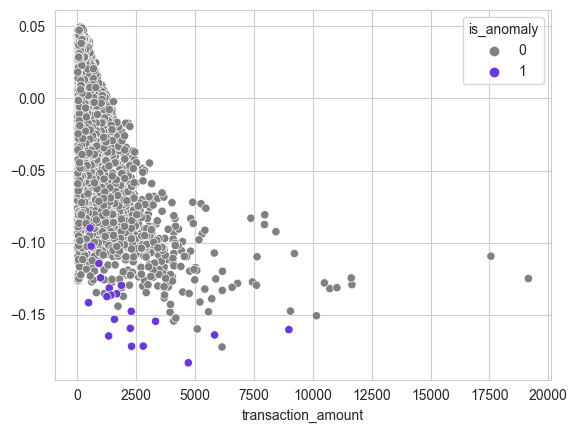

In [114]:
sns.scatterplot(y=preds, x='transaction_amount', hue='is_anomaly', palette=['gray', '#6A38D4'], data=dataset)

In [137]:
dataset.to_csv('data/transactions.csv', index=False)

## Upload dataset to kaggle

In [138]:
# If the dataset is not created yet on kaggle, run the following commands first (https://www.kaggle.com/product-feedback/52640)
#!kaggle datasets init -p data/
# !kaggle datasets create -p data/

Created dataset link: [synthetic-fraud-detection](https://www.kaggle.com/datasets/marcusos/synthetic-fraud-detection)

In [136]:
# Run the following command to update the dataset
!kaggle datasets version -p data/ -m "uploading the dataset"

Starting upload for file transactions.csv
100%|█████████████████████████████████████████| 426k/426k [00:02<00:00, 163kB/s]
Upload successful: transactions.csv (426KB)
Dataset version is being created. Please check progress at https://www.kaggle.com/marcusos/synthetic-fraud-detection
